# Лабораторная работа 3
*********
## Статистические методы обучения. Метод опорных векторов

На этом занятии компьютерного практикума Вы изучите метод опорных векторов (англ. SVM, Support Vector Machine) и примените данный метод для решения задачи классификации различных двумерных наборов данных. В последних публикациях на русском языке метод называется также машинами поддерживающих векторов, или, в более общем смысле, ядерными машинами (англ. Kernel Machine). В методах, основанных на их использовании, предусмотрен эффективный механизм обучения, а сами они позволяют представить сложные, нелинейные функции.   

Ядерные машины превосходят все другие способы распознавания рукописных символов, в частности цифр; кроме того, они быстро находят применение и в других приложениях, особенно в тех, которые отличаются большим количеством входных характеристик. Прежде чем приступить, собственно, к программированию, настоятельно рекомендуется ознакомиться с материалом лекций, а также с дополнительными материалами, имеющими отношение к задачам классификации.


In [2]:
# импортирую все необходимые библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import math
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import svm
import scipy.io

## Часть 1: Загрузка и визуализация данных

Как было сказано выше, Вы будете использовать метод опорных векторов для классификации 2-мерных наборов данных. В ходе работы над упражнением вы изучите собственно метод, а также научитесь использовать с SVM ядро Гаусса.

In [4]:
mat = scipy.io.loadmat('ex3data1.mat')
X = mat["X"]
y = mat["y"]

In [6]:
def plotData(X, y):
  pos_arr = None
  neg_arr = None
  for idx, flag in np.ndenumerate(y):
    if flag:
      if pos_arr is None:
        pos_arr = np.array(X[idx[0]])
      else:
        pos_arr = np.vstack((pos_arr, X[idx[0]]))
    else:
      if neg_arr is None:
        neg_arr = np.array(X[idx[0]])
      else:
        neg_arr = np.vstack((neg_arr, X[idx[0]]))

  plt.scatter(pos_arr[:, 0], pos_arr[:, 1], marker='+')
  plt.scatter(neg_arr[:, 0], neg_arr[:, 1], marker='o')

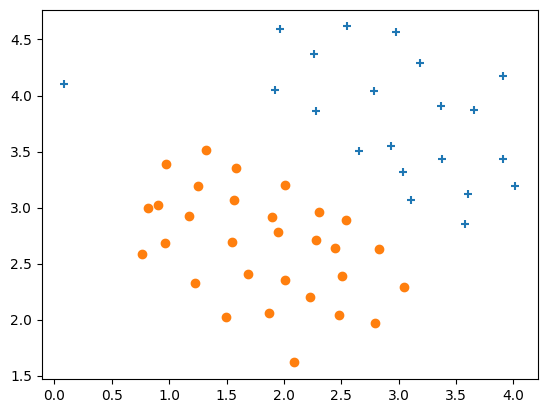

In [7]:
plotData(X, y)
plt.show()

## Часть 2: Обучение линейного классификатора SVM

In [8]:
def svmTrain(X, y, C, kernelFunction, tol=1e-3, max_passes=-1, sigma=0.1):
    y = y.flatten()

    if kernelFunction == "gaussian_rbf":
        clf = svm.SVC(C = C, kernel="rbf", tol=tol, max_iter=max_passes, verbose=2)
        return clf.fit(gaussianKernelGramMatrix(X,X, sigma=sigma), y)

    else:
        clf = svm.SVC(C = C, kernel=kernelFunction, tol=tol, max_iter=max_passes, verbose=2)
        return clf.fit(X, y)

In [9]:
def visualizeBoundaryLinear(X, y, model, c):
    plotData(X, y)
    w = model.coef_[0]
    b = model.intercept_[0]
    xp = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    yp = - (w[0] * xp + b) / w[1]

    plt.plot(xp, yp, linewidth = 3, color = 'blue', label='Граница классов')
    plt.legend(fontsize=15)
    plt.title('\n C = {:d} \n'.format(c), fontsize=20)

[LibSVM]

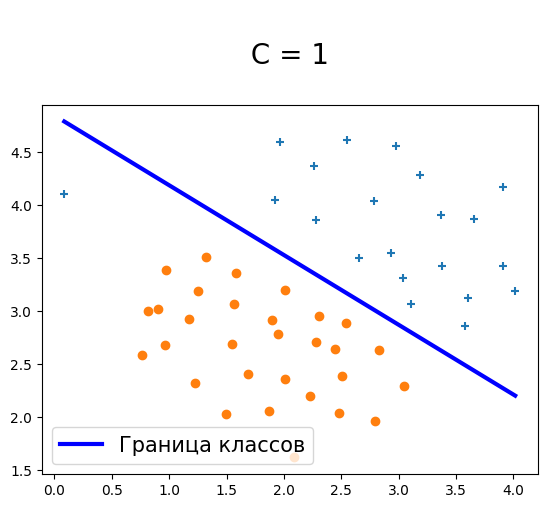

[LibSVM]

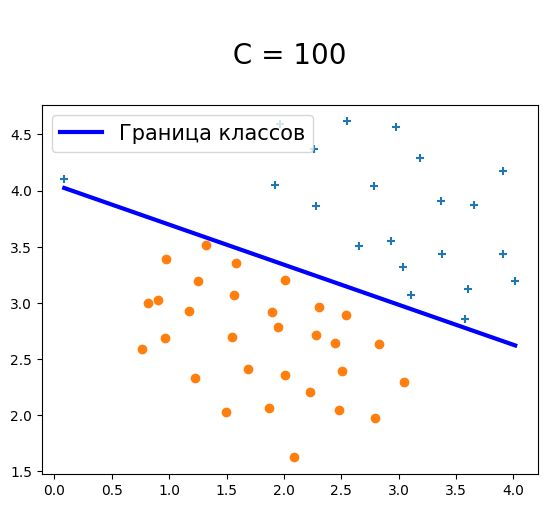

[LibSVM]

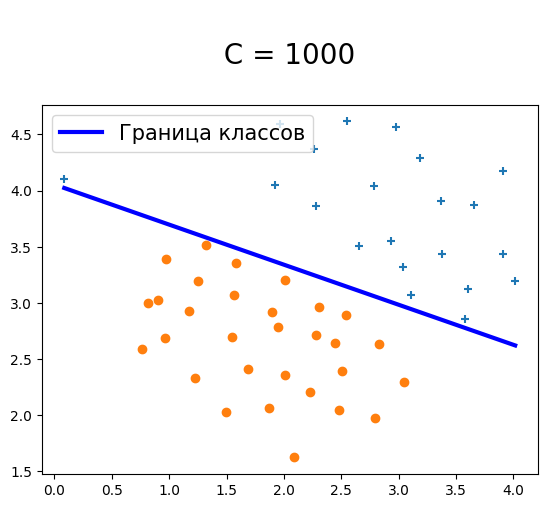

In [10]:
# Ваша задача в этой ячейке проанализировать как влияет параметр С на качество классификаци.
# Получить графики как на рисунках 2,3 и написать вывод.
C = [1, 100, 1000]
for c in C:
    model = svmTrain(X, y, c, "linear", 1e-3, 300)
    visualizeBoundaryLinear(X, y, model, c)
    plt.show()

## Часть 3: Применение радиальной базисной функции (ядра) Гаусса

В этой части упражнения демонстрируется применение метода опорных векторов для нелинейной классификации данных. В частности, предстоит применить SVM с ядром Гаусса в ситуации, когда линейное разделение невозможно.

Для нахождения нелинейных границ с помощью метода опорных векторов, необходимо запрограммировать функцию, реализующую применение ядра Гаусса. Под ядром Гаусса подразумевается функция, определяющая сходство пары образцов на основании оценки расстояния между ними $(х(i), х(j))$. Ядро Гаусса регулируется параметром $σ$, который определяет, насколько быстро уменьшается «схожесть» двух примеров при увеличении расстояния между ними.

Необходимую формулу для реализации функции gaussianKernel, Вы найдете в лабнике, в пункте $1.2.1$

In [12]:
def gaussianKernel(x1, x2, sigma=0.1):
  '''
  sim = gaussianKernel(x1, x2) Под ядром Гаусса подразумевается функция,
  определяющая сходство пары образцов на основании оценки расстояния между ними.
  Возвращаемой величиной является переменная sim

  Следует определить векторы x1 и x2 как векторы-столбцы
  '''

  diff = x1 - x2
  norm = np.dot(diff, diff)
  sim = np.exp(-norm / (2 * (sigma ** 2)))
  return sim

In [13]:
def gaussianKernelGramMatrix(X1, X2, K_function=gaussianKernel, sigma=0.1):
  gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
  for i, x1 in enumerate(X1):
    for j, x2 in enumerate(X2):
      gram_matrix[i, j] = K_function(x1, x2, sigma)
  return gram_matrix

Как только вы закончите написание программы gaussianKernel.m, ноутбук проверит Вашу функцию нахождения ядра на 2-х представленных примерах, в ответе Вы должны будете увидеть следующее значение: 0.324652

In [14]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

print("Gaussian Kernel between x1 =", x1, ", x2 =", x2, ", sigma =", sigma, ":\n{:f}".format(sim))

Gaussian Kernel between x1 = [1 2 1] , x2 = [ 0  4 -1] , sigma = 2 :
0.324652


## Часть 4: Визуализация обучающего набора 2

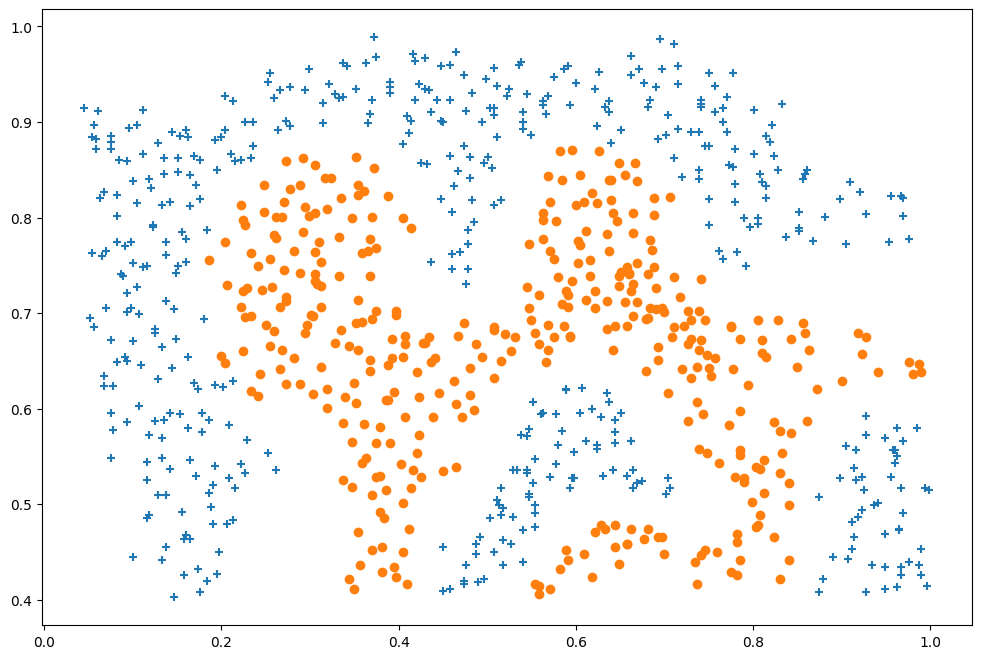

In [15]:
mat = scipy.io.loadmat('ex3data2.mat')
X = mat["X"]
y = mat["y"]

plt.figure(figsize=(12,8))
plotData(X, y)

## Часть 5: Обучение SVM с радиальной базисной функцией Гаусса (Набор данных 2)

Используя SVM с ядром Гаусса, построить нелинейную границу раздела, которая наиболее точно подойдет для классификации предоставленного набора данных.

Если Вы правильно написали программу расчета ядра Гаусса, ноутбук продолжит обучение алгоритма, используя 2-й набор данных. На графике (рис. 5) изображена граница раздела 2-х областей, найденная с помощью метода опорных векторов с ядром Гаусса.


In [16]:
def visualizeBoundary(X, y, model, varargin=0):
    x1plot = np.linspace(X[:,0].min(), X[:,0].max(), 100).T
    x2plot = np.linspace(X[:,1].min(), X[:,1].max(), 100).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        this_X = np.column_stack((X1[:, i], X2[:, i]))
        vals[:, i] = model.predict(gaussianKernelGramMatrix(this_X, X))
    plotData(X, y)
    plt.contour(X1, X2, vals, colors="blue", levels=[0], linewidth=10, label='Граница классов')

[LibSVM]

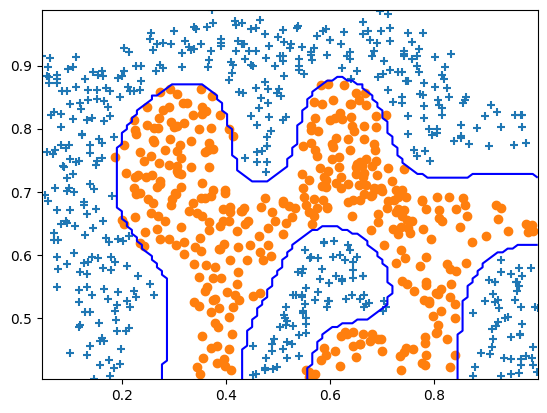

In [17]:
C = 1
sigma = 0.1

model = svmTrain(X, y, C, "gaussian_rbf", sigma=sigma)
visualizeBoundary(X, y, model)

## Часть 6: Визуализация обучающего набора 3

В этой части упражнения Вы усовершенствуете свои навыки по использованию метода опорных векторов с ядром Гаусса для проведения нелинейной классификации данных. Следующая часть ноутбука загрузит и отобразит график с набором данных для этой части упражнения

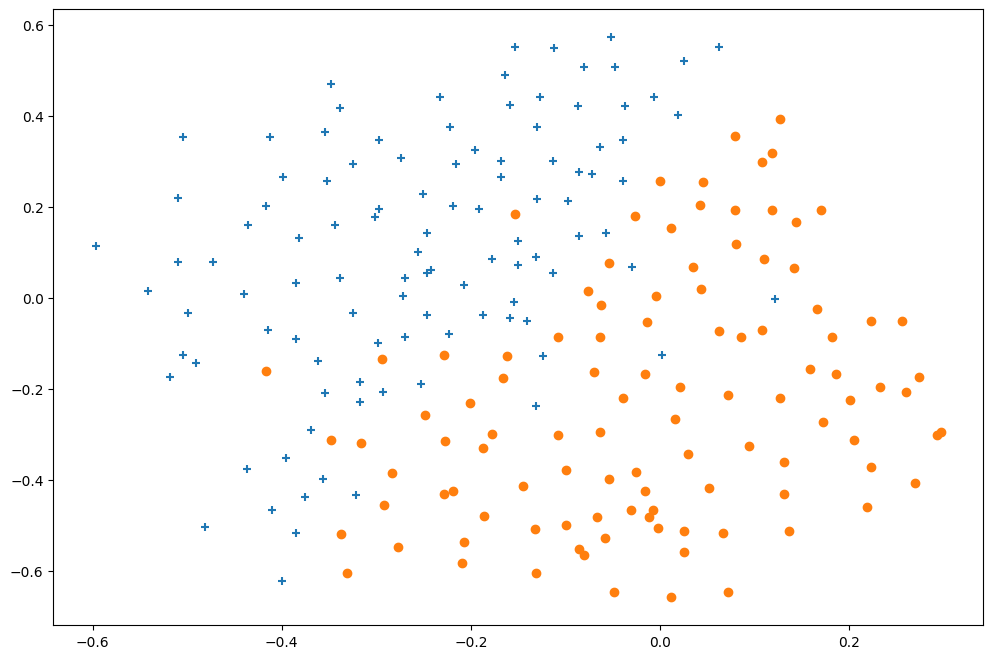

In [18]:
mat = scipy.io.loadmat('ex3data3.mat')
X = mat["X"]
y = mat["y"]

plt.figure(figsize=(12,8))
plotData(X, y)

In [19]:
def dataset3Params(X, y, Xval, yval):
  '''
  DATASET3PARAMS возвращает искомые параметры C и sigma для третьей части
  упражнения, в котором требуется определить оптимальные значения (C, sigma)
  для эффективного использования SVM с некоторой радиальной базисной функцией
  (например, c гауссовским ядром)

  Следует запрограммировать функцию, используя метод перекрестной проверки (кросс-валидация).

  Указание: Необходимо также рассчитать ошибку для набора данных, выбранных для проверки.
            Ошибка определяет долю примеров для перекрестной проверки, классифицированных
            неправильно.
  '''
  values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
  max_score = 0
  params = {'C': None, 'sigma': None}

  for C in values:
      for sigma in values:
          model = svm.SVC(kernel='rbf', C=C, gamma=1/(2*sigma**2))
          model.fit(X, y)
          score = model.score(Xval, yval)
          if score > max_score:
              max_score = score
              params['C'] = C
              params['sigma'] = sigma

  return params['C'], params['sigma']

## Часть 7: Обучение SVM с радиальной базисной функцией Гаусса (Набор данных 3)

In [20]:
Xval = mat["Xval"]
yval = mat["yval"]

# Задание: Определить оптимальные параметры С и σ, используя метод перекрестной проверки с помощью множества Хval, yval.
C, sigma = dataset3Params(X, y, Xval, yval)
print("Best parameters are C={:.2f}, sigma={:.2f}".format(C, sigma))

Best parameters are C=1.00, sigma=0.10


[LibSVM]

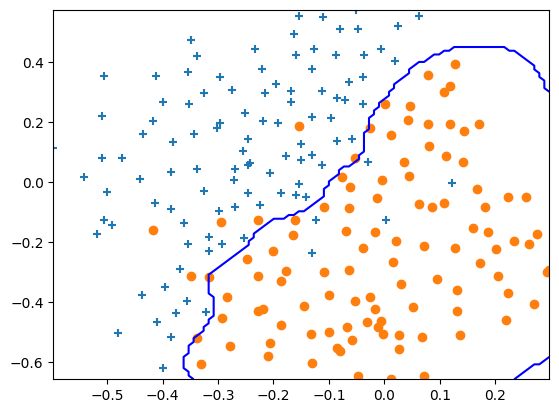

In [21]:
model = svmTrain(X, y, C, "gaussian_rbf", sigma=sigma)
visualizeBoundary(X, y, model)